Nov 2022

This is a fork of https://github.com/adashofdata/nlp-in-python-tutorial.  Rather than using the transcripts of stand-up comedians, it uses the text of New Testament books of the Bible.

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each book:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Matthew,Mark,Luke,John,Acts,Romans,1 Corinthians,2 Corinthians,Galatians,Ephesians,...,Philemon,Hebrews,James,1 Peter,2 Peter,1 John,2 John,3 John,Jude,Revelation
aaron,0,0,1,0,1,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
abaddon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0
abandoning,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words in each book
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

#top_dict

In [3]:
# Print the top 15 words in each book
for book, top_words in top_dict.items():
    print(book)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Matthew
said, jesus, father, came, went, son, heaven, man, tell, disciples, did, come, lord, people
---
Mark
said, jesus, came, went, man, god, disciples, crowd, come, saw, son, asked, began, john
---
Luke
said, jesus, son, man, god, people, lord, came, come, things, tell, went, say, father
---
John
jesus, said, father, know, man, god, replied, come, world, disciples, came, son, believe, sent
---
Acts
paul, god, said, lord, people, man, came, jesus, men, went, peter, spirit, jews, day
---
Romans
god, law, christ, sin, lord, faith, jesus, spirit, righteousness, good, death, gentiles, things, grace
---
1 Corinthians
god, lord, christ, body, things, spirit, man, know, brothers, jesus, does, people, sisters, come
---
2 Corinthians
god, christ, lord, did, glory, jesus, spirit, boast, know, just, body, come, make, according
---
Galatians
christ, law, god, spirit, jesus, woman, faith, gospel, brothers, son, live, flesh, circumcised, abraham
---
Ephesians
christ, god, lord, jesus, love, spirit

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words in each NT book
words = []
for book in data.columns:
    top = [word for (word, count) in top_dict[book]]
    for t in top:
        words.append(t)
        
#words

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('god', 27),
 ('jesus', 24),
 ('lord', 21),
 ('things', 20),
 ('christ', 19),
 ('people', 18),
 ('come', 15),
 ('love', 15),
 ('did', 14),
 ('know', 14),
 ('faith', 14),
 ('father', 11),
 ('good', 11),
 ('spirit', 11),
 ('grace', 11),
 ('like', 10),
 ('truth', 10),
 ('way', 9),
 ('brothers', 9),
 ('just', 9),
 ('said', 8),
 ('son', 8),
 ('say', 8),
 ('day', 8),
 ('life', 8),
 ('does', 8),
 ('came', 7),
 ('law', 7),
 ('time', 7),
 ('holy', 7),
 ('live', 7),
 ('man', 6),
 ('saying', 6),
 ('heard', 6),
 ('world', 6),
 ('according', 6),
 ('body', 6),
 ('sisters', 6),
 ('person', 6),
 ('gospel', 6),
 ('went', 5),
 ('away', 5),
 ('saw', 5),
 ('let', 5),
 ('children', 5),
 ('dear', 5),
 ('tell', 4),
 ('disciples', 4),
 ('house', 4),
 ('sin', 4),
 ('flesh', 4),
 ('hope', 4),
 ('church', 4),
 ('glory', 4),
 ('peace', 4),
 ('message', 4),
 ('evil', 4),
 ('teaching', 4),
 ('heaven', 3),
 ('kingdom', 3),
 ('began', 3),
 ('peter', 3),
 ('sent', 3),
 ('men', 3),
 ('righteousness', 3),
 ('death', 3)

In [6]:
# If more than half of the books have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['god',
 'jesus',
 'lord',
 'things',
 'christ',
 'people',
 'come',
 'love',
 'did',
 'know',
 'faith',
 'father',
 'good',
 'spirit',
 'grace',
 'like',
 'truth',
 'way',
 'brothers',
 'just',
 'said',
 'son',
 'say',
 'day',
 'life',
 'does',
 'came',
 'law',
 'time',
 'holy',
 'live']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.book_text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

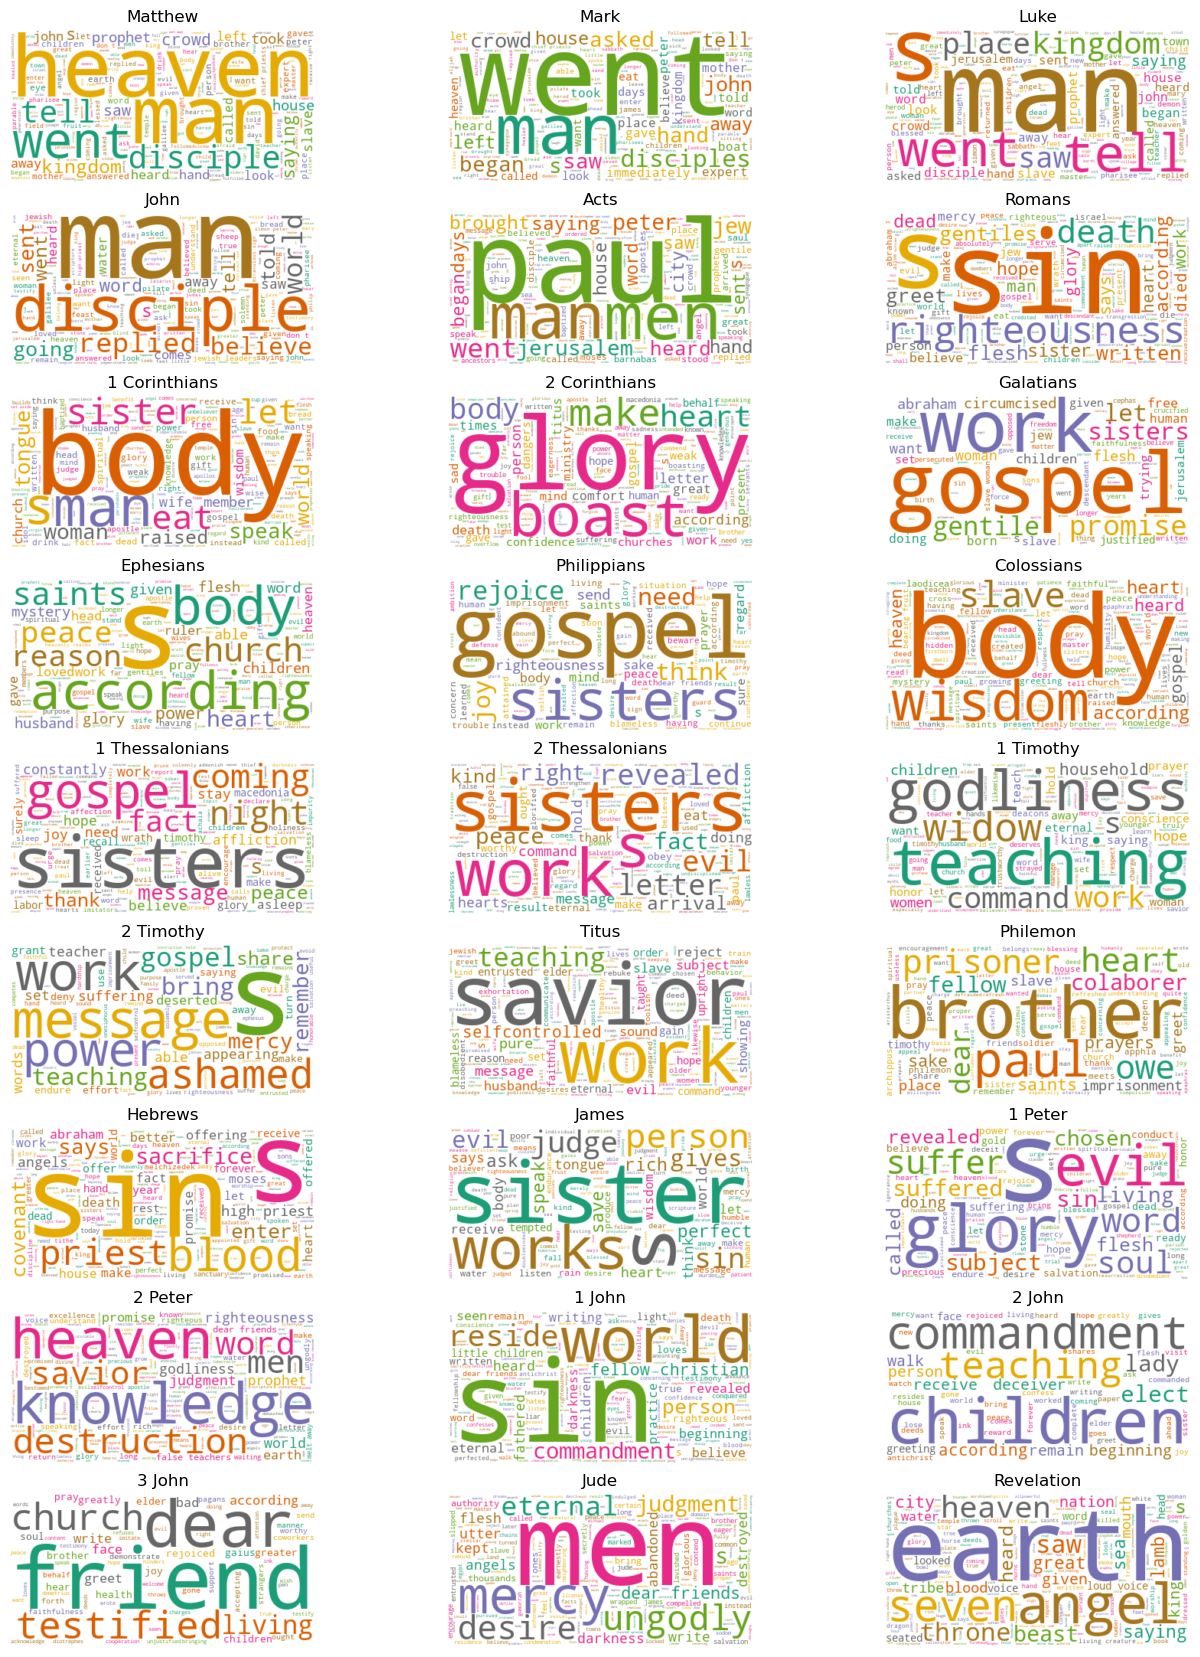

In [9]:
# Reset the output dimensions
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 21]

# Create subplots for each book
for index, book in enumerate(data.columns):
    wc.generate(data_clean.book_text[book])
    
    plt.subplot(9, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(book)
    
plt.show()

### Findings

* What do we notice?

## Number of Words

### Analysis

In [10]:
# Find the number of unique words used in each book

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for book in data.columns:
    uniques = data[book].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['book', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,book,unique_words
23,2 John,74
24,3 John,83
17,Philemon,117
13,2 Thessalonians,221
25,Jude,227
22,1 John,254
16,Titus,287
12,1 Thessalonians,354
21,2 Peter,439
11,Colossians,450


In [11]:
# Calculate the words per chapter in each book

# Find the total number of words in each book
total_list = []
for book in data.columns:
    totals = sum(data[book])
    total_list.append(totals)
    
# Number of chapters in each book
number_of_chapters = [28, 16, 24, 21, 28, 16, 16, 13, 6, 6, 4, 4, 5, 3, 6, 4, 3, 1, 13, 5, 5, 3, 5, 1, 1, 1, 22]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['number_of_chapters'] = number_of_chapters
data_words['words_per_chapter'] = data_words['total_words'] / data_words['number_of_chapters']

# Sort the dataframe by words per chapter
data_wpc_sort = data_words.sort_values(by='words_per_chapter')
data_wpc_sort

,book,unique_words,total_words,number_of_chapters,words_per_chapter
23,2 John,74,107,1,107.000000
24,3 John,83,115,1,115.000000
13,2 Thessalonians,221,382,3,127.333333
12,1 Thessalonians,354,680,5,136.000000
16,Titus,287,409,3,136.333333
17,Philemon,117,156,1,156.000000
7,2 Corinthians,931,2112,13,162.461538
14,1 Timothy,602,981,6,163.500000
15,2 Timothy,455,686,4,171.500000
22,1 John,254,892,5,178.400000


In [12]:
# Sort the dataframe by number of chapters
data_numchap_sort = data_words.sort_values(by='number_of_chapters')
data_numchap_sort

,book,unique_words,total_words,number_of_chapters,words_per_chapter
17,Philemon,117,156,1,156.000000
24,3 John,83,115,1,115.000000
23,2 John,74,107,1,107.000000
25,Jude,227,295,1,295.000000
13,2 Thessalonians,221,382,3,127.333333
16,Titus,287,409,3,136.333333
21,2 Peter,439,681,3,227.000000
15,2 Timothy,455,686,4,171.500000
10,Philippians,459,799,4,199.750000
11,Colossians,450,768,4,192.000000


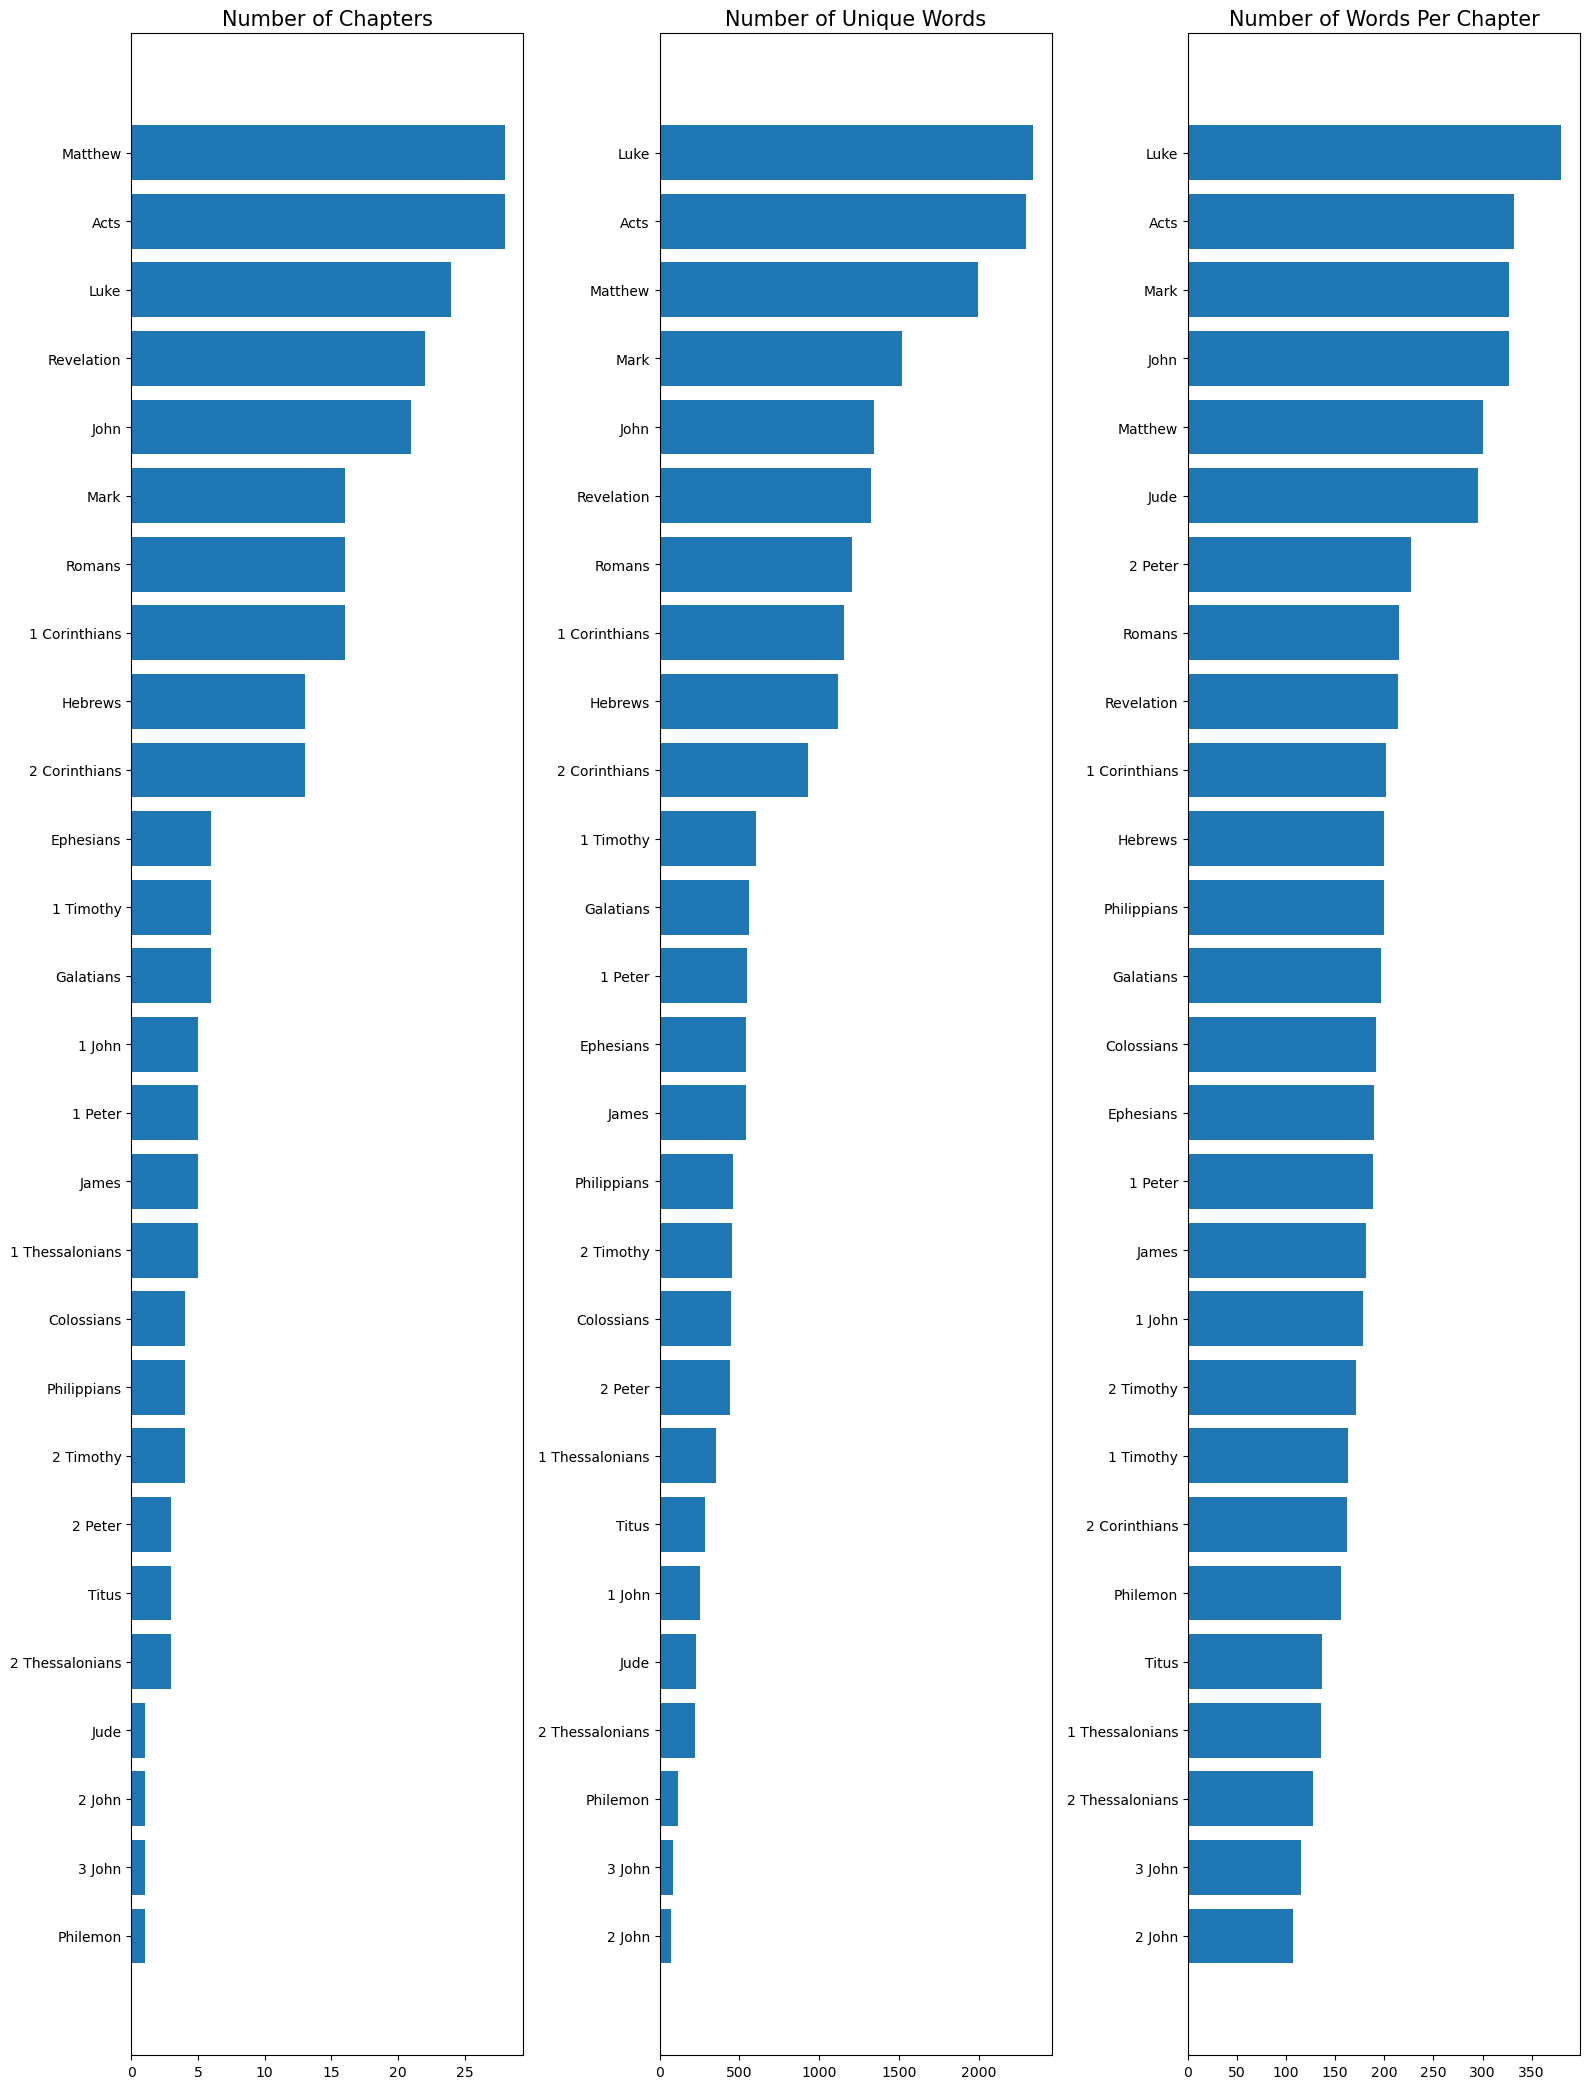

In [13]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos, data_numchap_sort.number_of_chapters, align='center')
plt.yticks(y_pos, data_numchap_sort.book)
plt.title('Number of Chapters', fontsize=15)

plt.subplot(1, 3, 2)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.book)
plt.title('Number of Unique Words', fontsize=15)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpc_sort.words_per_chapter, align='center')
plt.yticks(y_pos, data_wpc_sort.book)
plt.title('Number of Words Per Chapter', fontsize=15)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Luke (or his translator) used a large vocabulary!
   * The gospels have more unique words than nearly all other other books


* **Chapter Density**
   * Observations?

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. 

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.